## Load data

In [1]:
import pandas as pd
from mygene import MyGeneInfo


file_path = r".\GSE131047_raw_counts_mod.xlsx"

columns_to_keep = ['D10_LEC_Untouched_3d', 'D11_LEC_Untouched_3d', 'D12_LEC_Untouched_3d', 'D17_LEC_Untouched_3d',
                   'D10_LEC_118_3d', 'D10_LEC_4G4_3d', 'D10_LEC_AD2_3d', 'D10_LEC_IgG1_3d', 'D10_LEC_IgG2b_3d', 'D10_LEC_siCD73_3d', 'D10_LEC_siCtrl_3d',
                   'D11_LEC_118_3d', 'D11_LEC_4G4_3d', 'D11_LEC_AD2_3d', 'D11_LEC_IgG1_3d', 'D11_LEC_IgG2b_3d', 'D11_LEC_siCD73_3d', 'D11_LEC_siCtrl_3d',
                   'D12_LEC_118_3d', 'D12_LEC_4G4_3d','D12_LEC_AD2_3d', 'D12_LEC_IgG1_3d', 'D12_LEC_IgG2b_3d', 'D12_LEC_siCD73_3d', 'D12_LEC_siCtrl_3d',
                   'D17_LEC_118_3d', 'D17_LEC_4G4_3d', 'D17_LEC_AD2_3d', 'D17_LEC_IgG1_3d', 'D17_LEC_IgG2b_3d', 'D17_LEC_siCD73_3d', 'D17_LEC_siCtrl_3d',
                   'GeneID']
counts = pd.read_excel(file_path, usecols=columns_to_keep)

mg = MyGeneInfo()
gene_ids = counts['GeneID'].tolist()  
query_result = mg.querymany(gene_ids, scopes="ensembl.gene", fields="symbol", species="human")
gene_map = pd.DataFrame(query_result)[['query', 'symbol']].rename(columns={'query': 'GeneID', 'symbol': 'GeneName'})

counts = counts.merge(gene_map, on='GeneID', how='left')
counts = counts.drop('GeneID', axis=1)
counts.set_index('GeneName', inplace=True)

counts_summed = counts.groupby(counts.index).sum()
counts = counts_summed.copy()

counts.index.name = 'Symbol'

counts


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
1 input query terms found dup hits:	[('ENSG00000257545', 2)]
439 input query terms found no hit:	['ENSG00000277726', 'ENSG00000271895', 'ENSG00000226849', 'ENSG00000242349', 'ENSG00000234166', 'ENS


,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
7SK,22,37,43,37,52,31,39,63,40,39,...,25,32,27,20,31,33,25,25,14,23
A1BG,28,19,37,39,33,18,21,36,31,38,...,25,27,37,49,47,47,52,61,41,32
A1BG-AS1,68,75,83,79,76,57,47,111,116,112,...,88,111,132,149,211,155,172,172,184,128
A2M,166,215,201,196,204,197,108,271,1296,2008,...,422,661,112,145,177,93,132,242,171,133
A2M-AS1,7,9,10,6,13,12,10,14,31,54,...,23,33,5,10,16,8,14,6,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,39,34,37,51,40,8,26,43,26,21,...,21,26,12,22,12,11,13,1,14,12
ZYG11B,874,936,1015,1211,1125,860,873,1412,1102,1013,...,1430,915,717,884,1304,888,885,932,1096,869
ZYX,5264,4924,5804,6379,5888,4120,4252,7636,4936,4543,...,5018,3967,5031,6775,7462,5731,7992,8458,6303,5098


## Analyse counts

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gene_nodes = ["PROX1", "PDPN", "FLT4", "LYVE1", 
    "NOTCH1","NOTCH2", "NOTCH3", "NOTCH4", "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
    "VLDLR", "LRP8", "RELN", "DAB1", "DAB2", "SH3KBP1", "FYN",
    "MIB1", "MIB2", "NEURL1", "NEURL2", "NEURL3", "NEURL4", 
    "ADAM10", "ADAM17", 
    "PSEN1", "PSEN2", "PSENEN", "APH1A", "APH1B", "NCSTN", 
    "KPNA4", "KPNA3", "KPNA6", 
    "TBL1X", "HDAC3", "NCOR1", "NCOR2", "RBPJ", "SNW1", 
    "MAML1", "MAML2", "MAML3", "KAT2B", "EP300", "CREBBP", 
    "CDK8", "CCNC",
    "SKP1", "RBX1", "CUL1", "FBXW7",
    "HES1", "HES5", "HEY1", "HEY2", "HEYL", "MYC"]

missing_genes = set(gene_nodes) - set(counts.index)
print("Missing genes:", missing_genes)

Missing genes: {'HEYL', 'DLL3', 'NEURL1', 'NEURL3', 'HES5'}


<Figure size 1600x1000 with 0 Axes>

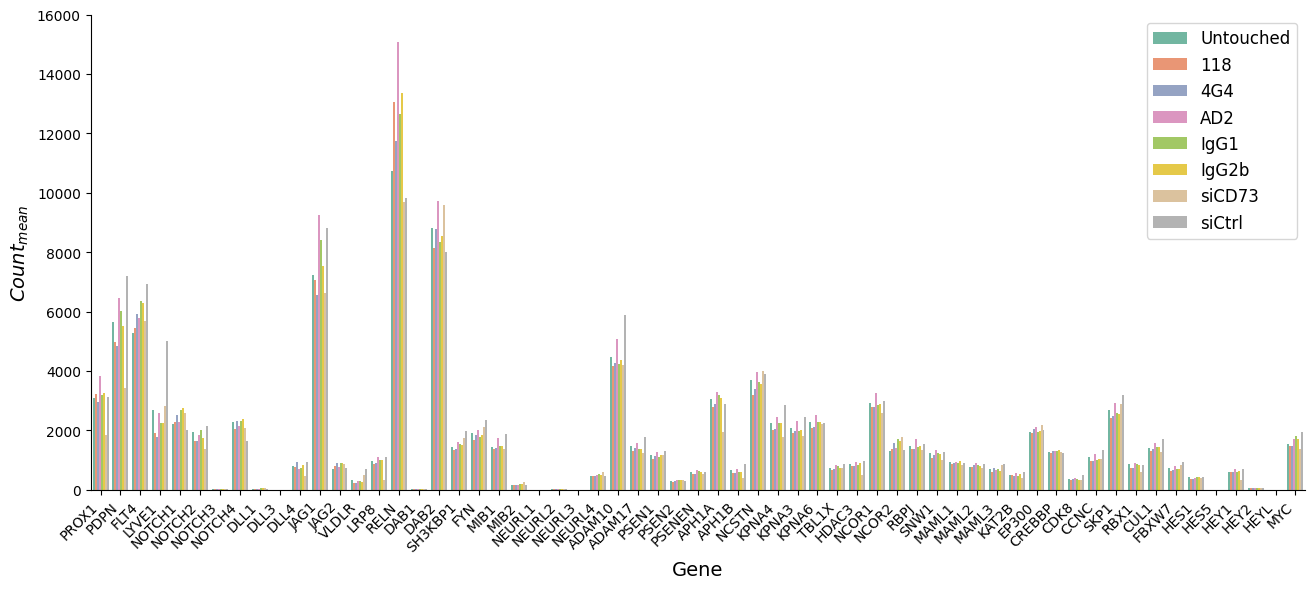

,Gene,Condition,Mean_Count
0,ADAM10,Untouched,4478.25
1,ADAM17,Untouched,1486.25
2,APH1A,Untouched,3070.25
3,APH1B,Untouched,678.75
4,CCNC,Untouched,1088.75
...,...,...,...
443,SH3KBP1,siCtrl,1983.25
444,SKP1,siCtrl,3180.75
445,SNW1,siCtrl,1287.50
446,TBL1X,siCtrl,863.75


In [4]:
filtered_counts = counts.loc[counts.index.intersection(gene_nodes)]

conditions = {
    'Untouched': [col for col in counts.columns if 'Untouched' in col],
    '118': [col for col in counts.columns if '_118_' in col],
    '4G4': [col for col in counts.columns if '_4G4_' in col],
    'AD2': [col for col in counts.columns if '_AD2_' in col],
    'IgG1': [col for col in counts.columns if '_IgG1_' in col],
    'IgG2b': [col for col in counts.columns if '_IgG2b_' in col],
    'siCD73': [col for col in counts.columns if '_siCD73_' in col],
    'siCtrl': [col for col in counts.columns if '_siCtrl_' in col]
}

mean_counts = pd.DataFrame({cond: filtered_counts[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts["Gene"] = mean_counts.index
melted = mean_counts.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()
melted

<Figure size 1600x1000 with 0 Axes>

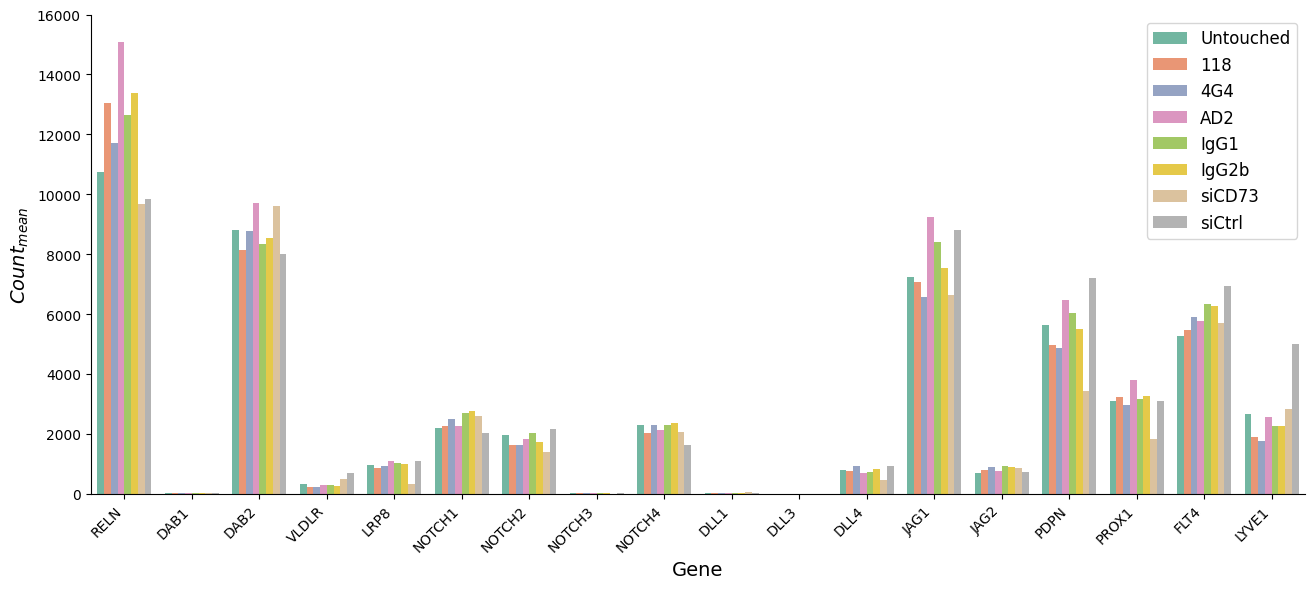

In [5]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

<span style="color:red">Commentary</span>: Raw read counts alone are not sufficient to compare expression levels among samples, as these values are affected by factors such as transcript length, total number of reads, and sequencing biases. https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0881-8 (doi: 10.1186/s13059-016-0881-8). But the counts show that DAB1 is not expressed in the dataset.

## 1st method: normalize by the highest value for each sample

In [6]:
normalized_counts = counts.divide(counts.max())
max_indices = counts.idxmax()  

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
lec_markers = ['PROX1', 'PDPN', 'LYVE1', 'FLT4']

for gene in lec_markers:
    if gene in counts.index:
        values = counts.loc[gene]
        print(f"{gene}:")
        for sample, value in values.items():
            print(f"  {sample}: {value:.3f}")
    else:
        print(f"{gene}: not found in counts")

Genes having the highest counts per sample:

D10_LEC_118_3d: THBS1 (Count value: 103734.000)
D10_LEC_4G4_3d: THBS1 (Count value: 100886.000)
D10_LEC_AD2_3d: FN1 (Count value: 114642.000)
D10_LEC_IgG1_3d: FN1 (Count value: 129684.000)
D10_LEC_IgG2b_3d: THBS1 (Count value: 121631.000)
D10_LEC_siCD73_3d: FN1 (Count value: 169067.000)
D10_LEC_siCtrl_3d: THBS1 (Count value: 119417.000)
D10_LEC_Untouched_3d: THBS1 (Count value: 145681.000)
D11_LEC_118_3d: MT-CO1 (Count value: 138486.000)
D11_LEC_4G4_3d: MT-CO1 (Count value: 132088.000)
D11_LEC_AD2_3d: MT-CO1 (Count value: 142453.000)
D11_LEC_IgG1_3d: MT-CO1 (Count value: 127724.000)
D11_LEC_IgG2b_3d: THBS1 (Count value: 141149.000)
D11_LEC_siCD73_3d: MT-RNR2 (Count value: 140447.000)
D11_LEC_siCtrl_3d: THBS1 (Count value: 143757.000)
D11_LEC_Untouched_3d: MT-CO1 (Count value: 112117.000)
D12_LEC_118_3d: FN1 (Count value: 151566.000)
D12_LEC_4G4_3d: FN1 (Count value: 155449.000)
D12_LEC_AD2_3d: FN1 (Count value: 184080.000)
D12_LEC_IgG1_3d: F

<span style="color:red">Commentary</span>: Normalizing each sample independently by its highest expression value results in non-interpretable outputs, particularly for genes with relatively low expression. This approach causes lymphatic endothelial cell (LEC) markers such as PDPN, PROX1, LYVE-1, and FLT4 to appear artificially suppressed, often approaching zero. Consequently, this method fails to reflect the actual biological variability or relative gene activity between samples. Moreover, it cannot provide meaningful insights into the likelihood of a gene being transcriptionally active or inactive, as the normalization distorts the relative expression landscape across the dataset.


## 2nd method: normalize by the highest value for each sample conserving only the genes related to the map

In [7]:
counts_2nd = counts.loc[counts.index.intersection(gene_nodes)]
counts_2nd


,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
ADAM10,3409,3606,3889,4426,4290,3747,3981,5436,5009,4413,...,7693,4437,3559,4399,5873,4165,4526,5684,6209,4511
ADAM17,1062,1157,1106,1392,1239,1021,1163,1766,1549,1444,...,2187,1425,1223,1497,2055,1455,1561,1788,2177,1648
APH1A,2434,2299,2630,2962,2766,1800,1982,3821,3565,3548,...,3251,2743,2004,2628,3613,2611,2960,2553,3242,2600
APH1B,529,526,524,625,609,383,571,863,623,597,...,989,585,583,641,917,654,701,502,1015,745
CCNC,880,902,907,1019,1040,908,851,1356,1136,894,...,1763,1005,848,1042,1471,994,1154,1346,1420,1135
CDK8,310,303,329,372,359,338,328,493,354,341,...,665,371,280,402,498,352,356,361,501,341
CREBBP,1176,1165,1244,1446,1467,1327,1094,1779,1518,1678,...,1427,1006,884,1105,1358,1013,1171,1542,1191,986
CUL1,1179,1297,1352,1545,1503,1173,1190,1848,1638,1361,...,2192,1244,1035,1366,1824,1353,1430,1516,1785,1347
DAB1,21,14,26,22,20,23,11,27,17,19,...,21,26,15,12,13,12,19,13,12,12


In [8]:
normalized_counts = counts_2nd.divide(counts_2nd.max(), axis=1)
max_indices = counts_2nd.idxmax() 

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
normalized_counts

Genes having the highest counts per sample:

D10_LEC_118_3d: RELN (Count value: 6114.000)
D10_LEC_4G4_3d: DAB2 (Count value: 6634.000)
D10_LEC_AD2_3d: RELN (Count value: 7004.000)
D10_LEC_IgG1_3d: DAB2 (Count value: 7352.000)
D10_LEC_IgG2b_3d: RELN (Count value: 6970.000)
D10_LEC_siCD73_3d: DAB2 (Count value: 7714.000)
D10_LEC_siCtrl_3d: PDPN (Count value: 5836.000)
D10_LEC_Untouched_3d: DAB2 (Count value: 8805.000)
D11_LEC_118_3d: RELN (Count value: 26582.000)
D11_LEC_4G4_3d: RELN (Count value: 21016.000)
D11_LEC_AD2_3d: RELN (Count value: 25459.000)
D11_LEC_IgG1_3d: RELN (Count value: 22830.000)
D11_LEC_IgG2b_3d: RELN (Count value: 27375.000)
D11_LEC_siCD73_3d: RELN (Count value: 15457.000)
D11_LEC_siCtrl_3d: RELN (Count value: 15067.000)
D11_LEC_Untouched_3d: RELN (Count value: 16942.000)
D12_LEC_118_3d: RELN (Count value: 11405.000)
D12_LEC_4G4_3d: RELN (Count value: 10223.000)
D12_LEC_AD2_3d: RELN (Count value: 13816.000)
D12_LEC_IgG1_3d: JAG1 (Count value: 11657.000)
D12_LEC_IgG2

,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
ADAM10,0.557573,0.543563,0.555254,0.602013,0.615495,0.485740,0.682145,0.617376,0.188436,0.209983,...,0.605843,0.462525,0.440307,0.445333,0.419320,0.427750,0.474076,0.464721,0.556462,0.455611
ADAM17,0.173700,0.174405,0.157910,0.189336,0.177762,0.132357,0.199280,0.200568,0.058273,0.068710,...,0.172232,0.148546,0.151305,0.151549,0.146723,0.149430,0.163507,0.146186,0.195107,0.166448
APH1A,0.398103,0.346548,0.375500,0.402884,0.396844,0.233342,0.339616,0.433958,0.134113,0.168824,...,0.256025,0.285938,0.247928,0.266046,0.257961,0.268152,0.310045,0.208732,0.290554,0.262600
APH1B,0.086523,0.079289,0.074814,0.085011,0.087374,0.049650,0.097841,0.098012,0.023437,0.028407,...,0.077886,0.060982,0.072127,0.064892,0.065472,0.067166,0.073426,0.041043,0.090966,0.075245
CCNC,0.143932,0.135966,0.129497,0.138602,0.149211,0.117708,0.145819,0.154003,0.042736,0.042539,...,0.138841,0.104764,0.104912,0.105487,0.105026,0.102085,0.120876,0.110048,0.127263,0.114635
CDK8,0.050703,0.045674,0.046973,0.050598,0.051506,0.043816,0.056203,0.055991,0.013317,0.016226,...,0.052370,0.038674,0.034641,0.040696,0.035556,0.036151,0.037289,0.029515,0.044901,0.034441
CREBBP,0.192345,0.175610,0.177613,0.196681,0.210473,0.172025,0.187457,0.202044,0.057106,0.079844,...,0.112380,0.104868,0.109365,0.111865,0.096958,0.104036,0.122656,0.126073,0.106740,0.099586
CUL1,0.192836,0.195508,0.193033,0.210147,0.215638,0.152061,0.203907,0.209881,0.061621,0.064760,...,0.172626,0.129678,0.128047,0.138287,0.130230,0.138955,0.149785,0.123947,0.159975,0.136047
DAB1,0.003435,0.002110,0.003712,0.002992,0.002869,0.002982,0.001885,0.003066,0.000640,0.000904,...,0.001654,0.002710,0.001856,0.001215,0.000928,0.001232,0.001990,0.001063,0.001075,0.001212


<span style="color:red">Commentary</span>: Normalizing each sample independently by its maximum expression value distorts the biological relevance of the data, especially when applied to input state initialization in a Boolean model. This method disproportionately downscales moderately or even highly expressed model-relevant genes when a few unrelated genes dominate the expression profile. As a result, critical regulators such as NOTCH1 or RELN receive artificially low probabilities, failing to represent their true biological activity. This compression of expression values toward zero also hampers the ability to distinguish active from inactive states across samples. Therefore, this normalization strategy is unsuitable for defining biologically meaningful initial conditions in MaBoSS simulations and was excluded from further analysis.

## Use log2 to reduce difference of expression

In [9]:
import numpy as np

In [10]:
counts_log2 = np.log2(counts + 1)
counts_log2

,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
7SK,4.523562,5.247928,5.459432,5.247928,5.727920,5.000000,5.321928,6.000000,5.357552,5.321928,...,4.700440,5.044394,4.807355,4.392317,5.000000,5.087463,4.700440,4.700440,3.906891,4.584963
A1BG,4.857981,4.321928,5.247928,5.321928,5.087463,4.247928,4.459432,5.209453,5.000000,5.285402,...,4.700440,4.807355,5.247928,5.643856,5.584963,5.584963,5.727920,5.954196,5.392317,5.044394
A1BG-AS1,6.108524,6.247928,6.392317,6.321928,6.266787,5.857981,5.584963,6.807355,6.870365,6.820179,...,6.475733,6.807355,7.055282,7.228819,7.727920,7.285402,7.434628,7.434628,7.531381,7.011227
A2M,7.383704,7.754888,7.658211,7.622052,7.679480,7.629357,6.768184,8.087463,10.340963,10.972262,...,8.724514,9.370687,6.820179,7.189825,7.475733,6.554589,7.055282,7.924813,7.426265,7.066089
A2M-AS1,3.000000,3.321928,3.459432,2.807355,3.807355,3.700440,3.459432,3.906891,5.000000,5.781360,...,4.584963,5.087463,2.584963,3.459432,4.087463,3.169925,3.906891,2.807355,2.584963,3.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.321928,5.129283,5.247928,5.700440,5.357552,3.169925,4.754888,5.459432,4.754888,4.459432,...,4.459432,4.754888,3.700440,4.523562,3.700440,3.584963,3.807355,1.000000,3.906891,3.700440
ZYG11B,9.773139,9.871905,9.988685,10.243174,10.136991,9.749869,9.771489,10.464546,10.107217,9.985842,...,10.482808,9.839204,9.487840,9.789534,10.349834,9.796040,9.791163,9.865733,10.099348,9.764872
ZYX,12.362218,12.265908,12.503080,12.639341,12.523807,12.008779,12.054265,12.898790,12.269419,12.149747,...,12.293184,11.954196,12.296916,12.726218,12.865540,12.484823,12.964521,13.046271,12.622052,12.315999


<Figure size 1600x1000 with 0 Axes>

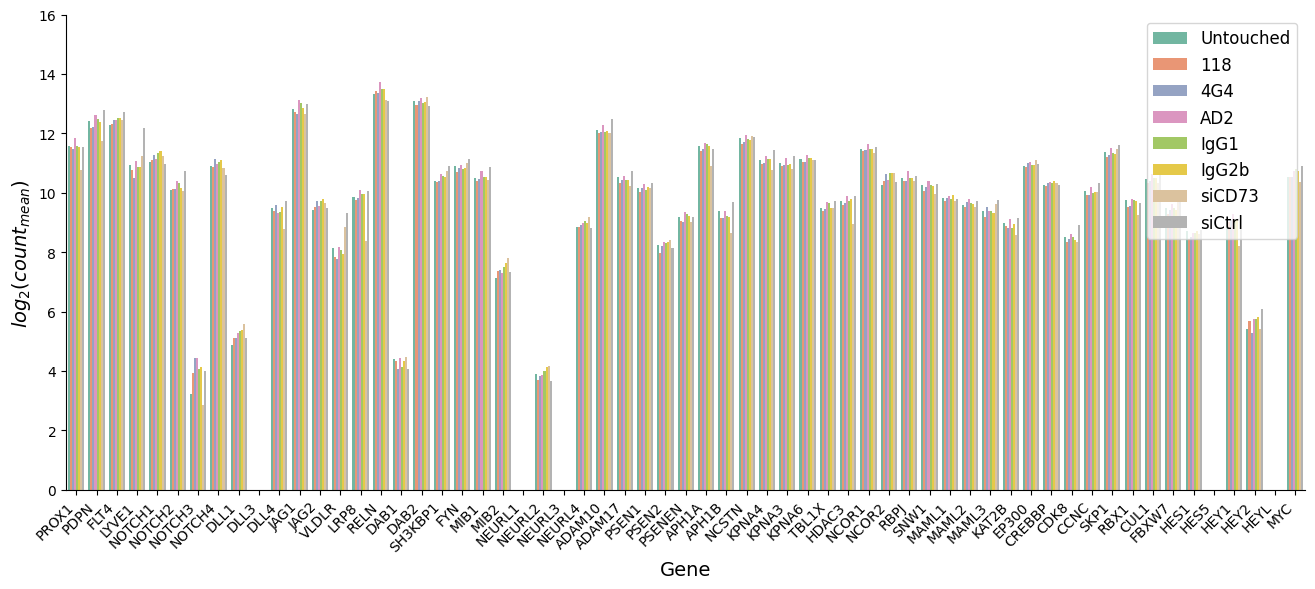

In [11]:
filtered_counts_log2 = counts_log2.loc[counts_log2.index.intersection(gene_nodes)]

conditions = {
'Untouched': [col for col in counts.columns if 'Untouched' in col],
    '118': [col for col in counts.columns if '_118_' in col],
    '4G4': [col for col in counts.columns if '_4G4_' in col],
    'AD2': [col for col in counts.columns if '_AD2_' in col],
    'IgG1': [col for col in counts.columns if '_IgG1_' in col],
    'IgG2b': [col for col in counts.columns if '_IgG2b_' in col],
    'siCD73': [col for col in counts.columns if '_siCD73_' in col],
    'siCtrl': [col for col in counts.columns if '_siCtrl_' in col]
}

mean_counts_log2 = pd.DataFrame({cond: filtered_counts_log2[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_log2["Gene"] = mean_counts_log2.index
melted_log2 = mean_counts_log2.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

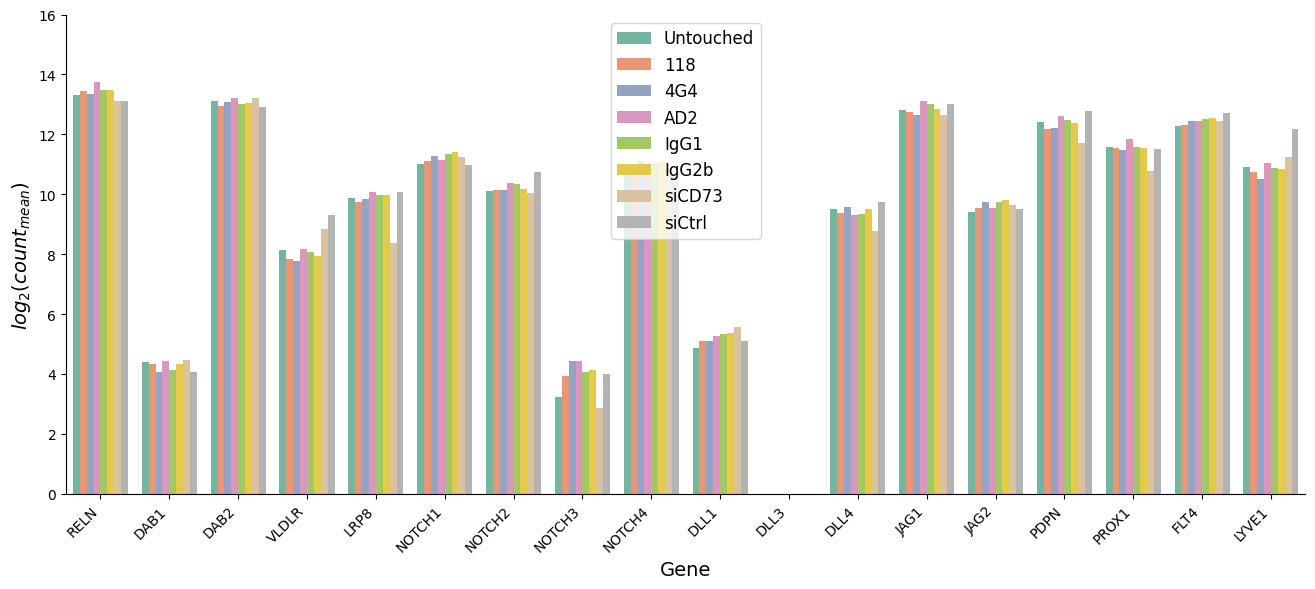

In [12]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

## 3rd method: normalizing using DESeq2 (as done by Ahmed) --> Inter sample comparison not within sample comparison

In [13]:
from pydeseq2.dds import DeseqDataSet
import pandas as pd
import os

In [14]:
counts_T = counts.T

metadata = pd.DataFrame(
    zip(
        counts_T.index,
        ['118', '4G4', 'AD2', 'IgG1', 'IgG2b', 'siCD73',  'siCtrl', 'CTRL'] * 4,
        ['D10'] * 8 + ['D11'] * 8 + ['D12'] * 8 + ['D17'] * 8
    ),
    columns=['Sample', 'Condition', 'Patient']
)

metadata = metadata.set_index('Sample')

metadata['Condition'] = pd.Categorical(
    metadata['Condition'],
    categories=['CTRL', '118', '4G4', 'AD2', 'IgG1', 'IgG2b', 'siCD73', 'siCtrl'],
    ordered=True
)
GSE_name = "GSE131047"
os.makedirs(f"{GSE_name}_outputs", exist_ok=True)
metadata.to_csv(r'.\GSE131047_outputs\GSE131047_DESeq2_metadata.csv', sep=',')

metadata

,Condition,Patient
Sample,,
D10_LEC_118_3d,118,D10
D10_LEC_4G4_3d,4G4,D10
D10_LEC_AD2_3d,AD2,D10
D10_LEC_IgG1_3d,IgG1,D10
D10_LEC_IgG2b_3d,IgG2b,D10
D10_LEC_siCD73_3d,siCD73,D10
D10_LEC_siCtrl_3d,siCtrl,D10
D10_LEC_Untouched_3d,CTRL,D10
D11_LEC_118_3d,118,D11


In [15]:
dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
dds.deseq2()
dds

C:\Users\Yanis\AppData\Local\Temp\ipykernel_16756\1947885380.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.51 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 1.99 seconds.

Fitting LFCs...
... done in 1.16 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.



AnnData object with n_obs × n_vars = 32 × 14851
    obs: 'Condition', 'Patient'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [16]:
import numpy as np

In [17]:
normed_counts_df = pd.DataFrame(
    dds.layers['normed_counts'].T,
    index=dds.var_names,
    columns=dds.obs_names
)

normed_counts_df = normed_counts_df.loc[normed_counts_df.index.intersection(gene_nodes)]
normed_counts_df.to_csv(r'.\GSE131047_outputs\GSE131047_DESeq2_norm.csv', sep=',')
normed_counts_df

Sample,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
ADAM10,3882.446918,4065.846645,4075.853088,3995.346619,4069.911139,4293.818792,4925.041531,4007.293025,4420.670651,4107.248037,...,5759.104449,4831.557601,4826.049163,4693.725516,4777.606378,4655.208761,4459.225359,4995.945985,5508.151176,4973.930235
ADAM17,1209.492117,1304.543696,1159.139500,1256.557274,1175.435874,1169.999730,1438.790078,1301.854209,1367.063054,1343.953357,...,1637.223636,1551.717282,1658.403520,1597.296453,1671.714815,1626.249399,1537.969683,1571.560771,1931.268338,1817.121930
APH1A,2772.037488,2592.174553,2756.362464,2673.795004,2624.096553,2062.683167,2452.005103,2816.752510,3146.274880,3302.179025,...,2433.751276,2986.919653,2717.449430,2804.071529,2939.126825,2918.307341,2916.329444,2243.956738,2876.055100,2866.818579
APH1B,602.468296,593.076909,549.176400,564.186994,577.756616,438.893140,706.405103,636.183569,549.825877,555.637226,...,740.381425,637.020779,790.555398,683.945909,745.967146,730.973957,690.657750,441.232386,900.430576,821.453785
CCNC,1002.215690,1017.025423,950.578234,919.850476,986.645125,1040.509064,1052.803402,999.611726,1002.571743,832.059766,...,1319.810366,1094.369031,1149.898761,1111.812227,1196.638683,1110.990998,1136.974385,1183.065323,1259.715682,1251.476572
CDK8,353.053254,341.639360,344.807320,335.804099,340.582307,387.326061,405.780865,363.428157,312.421124,317.374027,...,497.829775,403.990956,379.683553,428.933316,405.116291,393.429408,350.747730,317.300581,444.448984,375.994283
CREBBP,1339.324604,1313.563877,1303.769926,1305.303030,1391.738844,1520.655868,1353.427640,1311.437507,1339.704142,1561.740813,...,1068.275322,1095.457955,1198.715218,1179.033120,1104.714705,1132.227245,1153.723574,1355.339323,1056.564350,1087.185815
CUL1,1342.741248,1462.396866,1416.958955,1394.670250,1425.891945,1344.181864,1472.192771,1362.302706,1445.609608,1266.703961,...,1640.966717,1354.621964,1403.473134,1457.519676,1483.799427,1512.244287,1408.902400,1332.486649,1583.515840,1485.232549
DAB1,23.916511,15.785317,27.249211,19.859382,18.973945,26.356507,13.608505,19.903773,15.003274,17.683597,...,15.720940,28.312035,20.340190,12.803980,10.575325,13.412366,18.719682,11.426337,10.645485,13.231470


<Figure size 1600x1000 with 0 Axes>

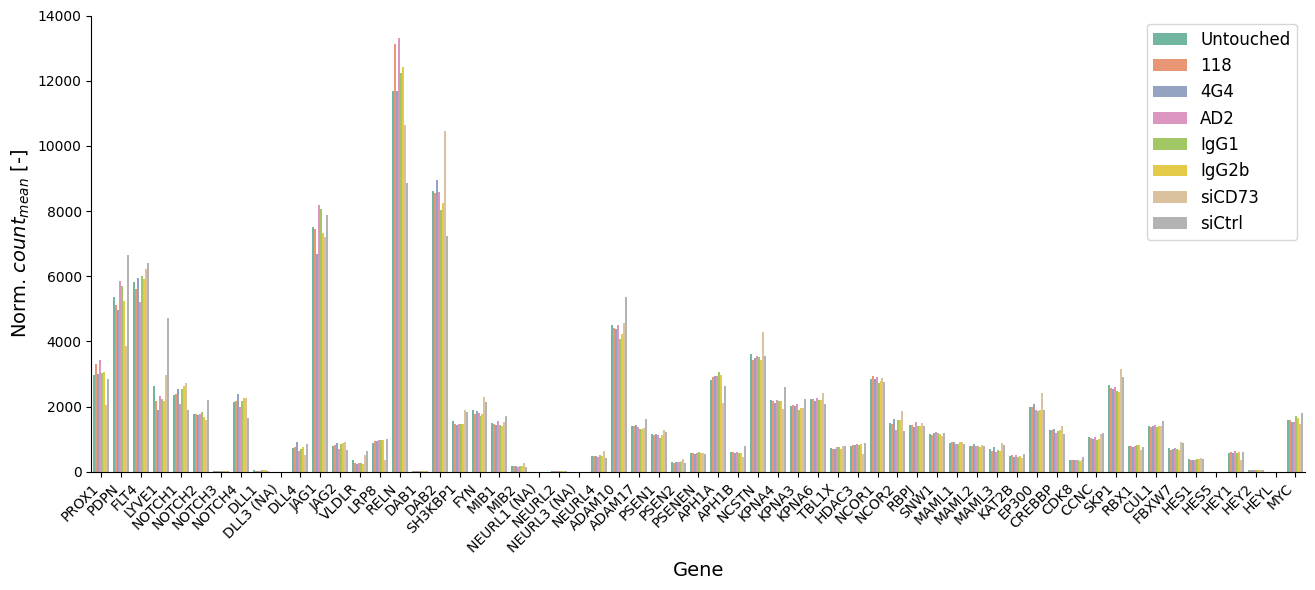

,Gene,Condition,Mean_Count
0,ADAM10,Untouched,4496.337261
1,ADAM17,Untouched,1408.706306
2,APH1A,Untouched,2826.889524
3,APH1B,Untouched,606.750775
4,CCNC,Untouched,1063.618904
...,...,...,...
443,SH3KBP1,siCtrl,1833.444770
444,SKP1,siCtrl,2893.616796
445,SNW1,siCtrl,1181.378635
446,TBL1X,siCtrl,796.946708


In [18]:
conditions = {
'Untouched': [col for col in counts.columns if 'Untouched' and '' in col],
    '118': [col for col in counts.columns if '_118_' in col],
    '4G4': [col for col in counts.columns if '_4G4_' in col],
    'AD2': [col for col in counts.columns if '_AD2_' in col],
    'IgG1': [col for col in counts.columns if '_IgG1_' in col],
    'IgG2b': [col for col in counts.columns if '_IgG2b_' in col],
    'siCD73': [col for col in counts.columns if '_siCD73_' in col],
    'siCtrl': [col for col in counts.columns if '_siCtrl_' in col]
}

mean_counts_norm = pd.DataFrame({cond: normed_counts_df[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_norm["Gene"] = mean_counts_norm.index
mean_counts_norm["Gene"] = mean_counts_norm["Gene"].replace({
    "DLL3": "DLL3 (NA)",
    "NEURL1": "NEURL1 (NA)",
    "NEURL3": "NEURL3 (NA)"
})
melted_norm = mean_counts_norm.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")
gene_nodes = [gene if gene not in ["DLL3", "NEURL1", "NEURL3"]
              else f"{gene} (NA)" for gene in gene_nodes]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.savefig(r'.\GSE131047_outputs\GSE131047_DESeq2_norm_mean_counts.png', dpi=600)
plt.show()
melted_norm

<Figure size 1600x1000 with 0 Axes>

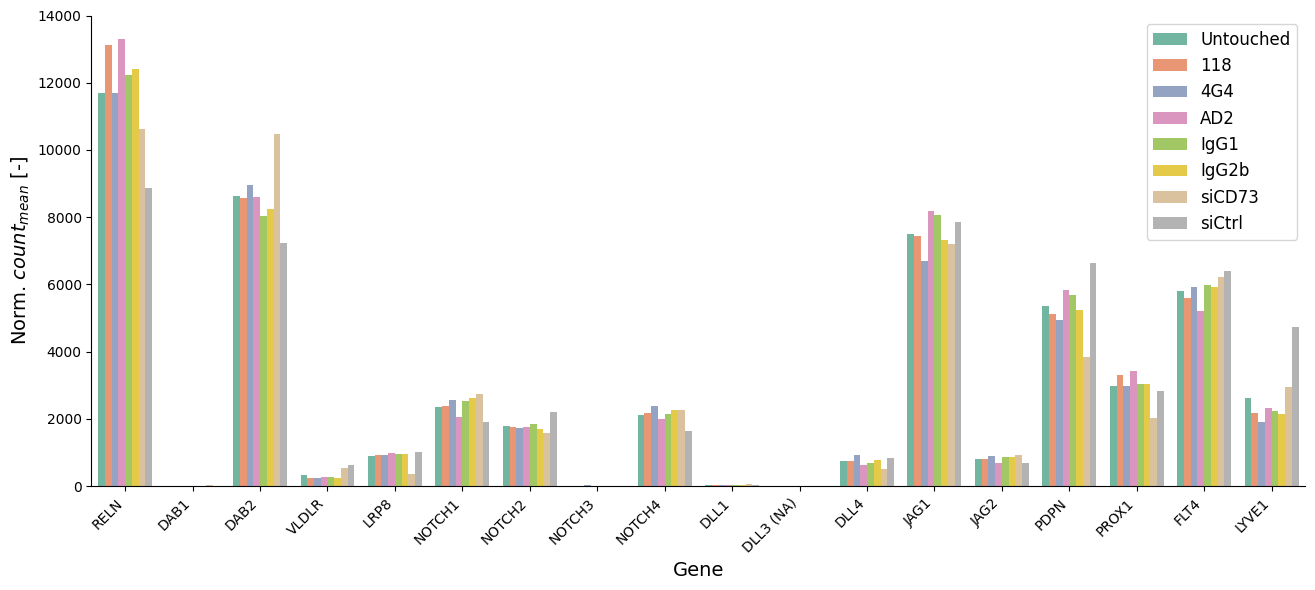

In [19]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3 (NA)", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.savefig(r'.\GSE131047_outputs\GSE131047_DESeq2_norm_mean_counts_few_genes.png', dpi=600)
plt.show()

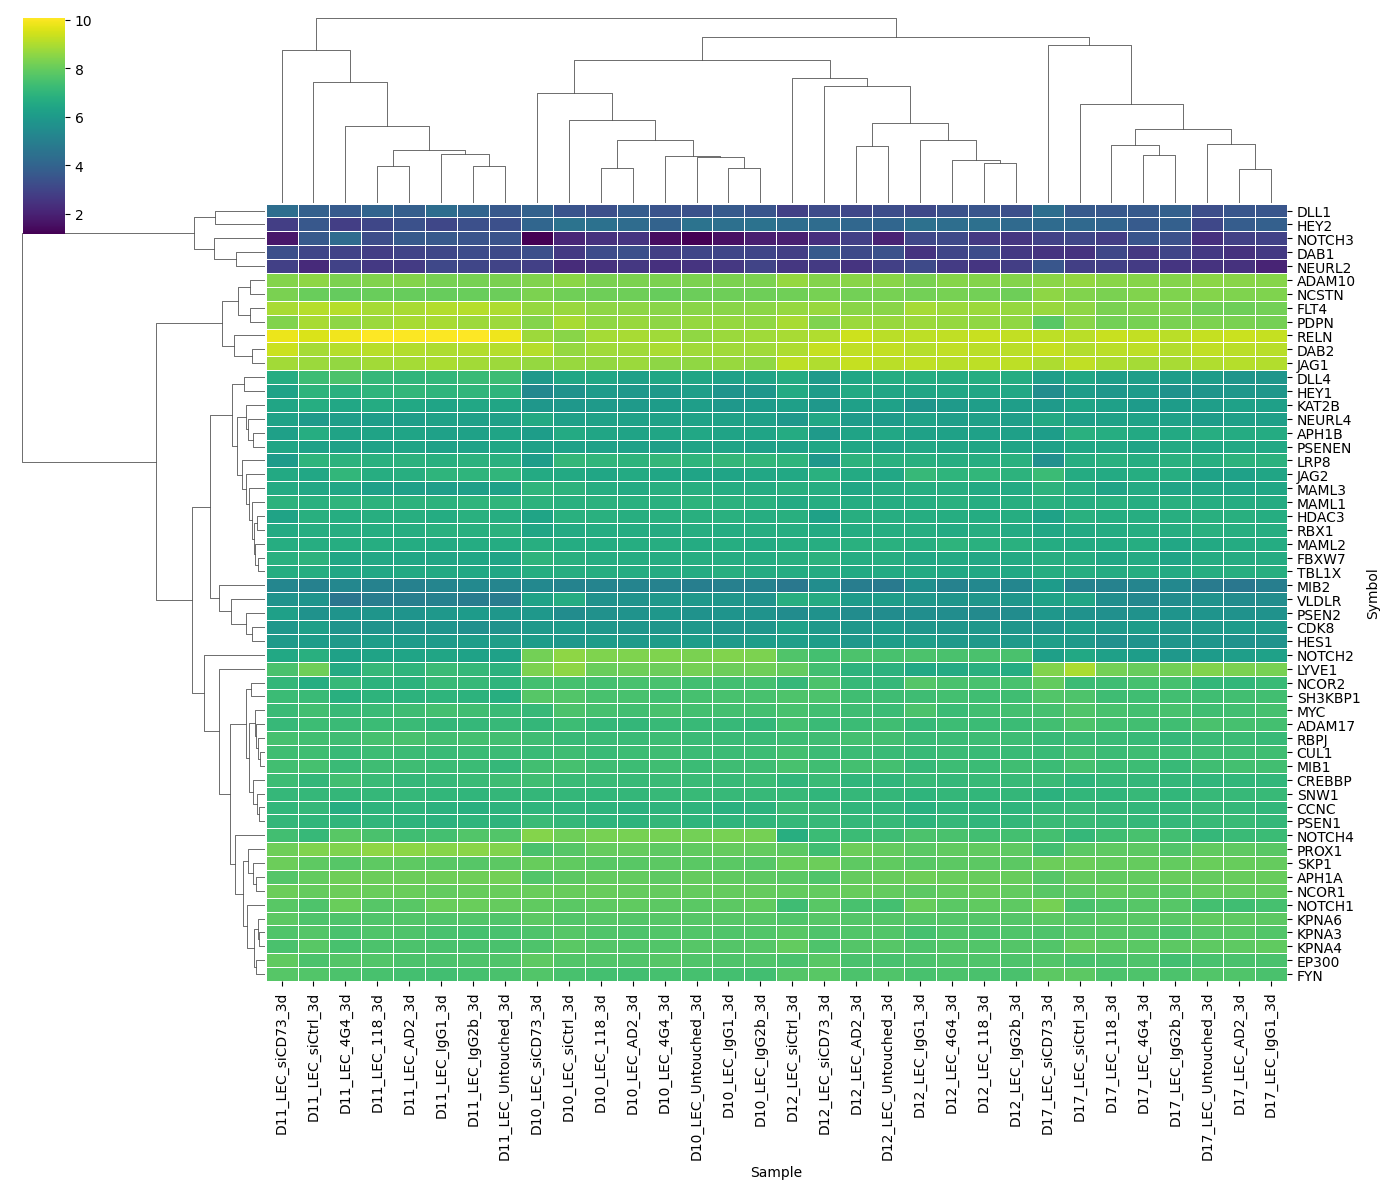

In [20]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

dds_signs = dds[:, dds.var_names.isin(gene_nodes)]
grapher = pd.DataFrame(dds_signs.layers['log1p'].T, index=dds_signs.var_names, columns=dds_signs.obs_names)

g = sns.clustermap(grapher, cmap='viridis', figsize=(14, 12), 
                   cbar_pos=(0.02, 0.8, 0.03, 0.18),
                   linewidths=0.5, col_cluster=True, row_cluster=True,
                   yticklabels=True, xticklabels=True)

In [21]:
log2_normed_counts = np.log2(dds.layers['normed_counts'] + 1)

log2_normed_counts_df = pd.DataFrame(
    log2_normed_counts.T,
    index=dds.var_names,
    columns=dds.obs_names
)

log2_normed_counts_df = log2_normed_counts_df.loc[log2_normed_counts_df.index.intersection(gene_nodes)]
log2_normed_counts_df.to_csv(r'.\GSE131047_outputs\GSE131047_DESeq2_log2_norm.csv', sep=',')

log2_normed_counts_df

Sample,D10_LEC_118_3d,D10_LEC_4G4_3d,D10_LEC_AD2_3d,D10_LEC_IgG1_3d,D10_LEC_IgG2b_3d,D10_LEC_siCD73_3d,D10_LEC_siCtrl_3d,D10_LEC_Untouched_3d,D11_LEC_118_3d,D11_LEC_4G4_3d,...,D12_LEC_siCtrl_3d,D12_LEC_Untouched_3d,D17_LEC_118_3d,D17_LEC_4G4_3d,D17_LEC_AD2_3d,D17_LEC_IgG1_3d,D17_LEC_IgG2b_3d,D17_LEC_siCD73_3d,D17_LEC_siCtrl_3d,D17_LEC_Untouched_3d
Symbol,,,,,,,,,,,,,,,,,,,,,
ADAM10,11.923122,11.989695,11.993240,11.964466,11.991136,12.068382,12.266213,11.968772,12.110376,12.004308,...,12.491879,12.238571,12.236926,12.196825,12.222374,12.184940,12.122901,12.286831,12.427614,12.280461
ADAM17,10.241378,10.350435,10.180083,10.296408,10.200207,10.193525,10.491643,10.347460,10.417919,10.393340,...,10.677917,10.600579,10.696449,10.642319,10.707976,10.668220,10.587749,10.618900,10.916080,10.828233
APH1A,11.437251,11.340504,11.429073,11.385213,11.358155,11.011006,11.260335,11.460329,11.619887,11.689639,...,11.249559,11.544926,11.408568,11.453822,11.521663,11.511410,11.510433,11.132472,11.490377,11.485738
APH1B,9.237134,9.214506,9.103750,9.142584,9.176813,8.781009,9.466393,9.315565,9.105453,9.120594,...,9.534072,9.317460,9.628547,9.419846,9.544901,9.515649,9.433915,8.788661,9.816073,9.683791
CCNC,9.970416,9.991558,9.894178,9.846823,9.947849,10.024460,10.041390,9.966667,9.970928,9.702276,...,10.367208,10.097201,10.168545,10.119994,10.225977,10.118929,10.152252,10.209533,10.300027,10.290568
CDK8,8.467823,8.420547,8.433825,8.395766,8.416089,8.601125,8.668108,8.509491,8.291959,8.314579,...,8.962404,8.661746,8.572448,8.747969,8.665749,8.623623,8.458397,8.314246,8.799116,8.558399
CREBBP,10.388367,10.360369,10.349580,10.351274,10.443709,10.571426,10.403468,10.358033,10.388775,10.609863,...,10.062418,10.098635,10.228476,10.204612,10.110763,10.146221,10.173332,10.405502,10.046530,10.087709
CUL1,10.392040,10.515105,10.469600,10.446742,10.478660,10.393586,10.524731,10.412890,10.498460,10.308002,...,10.681209,10.404739,10.455813,10.510289,10.536052,10.563429,10.461380,10.380988,10.629826,10.537444
DAB1,4.639030,4.069128,4.820139,4.382625,4.320047,4.773812,3.868737,4.385691,4.000295,4.223700,...,4.063584,4.873421,4.415501,3.787012,3.532981,3.849235,4.301564,3.635329,3.541699,3.831013
